In [1]:
#import pacakges
import numpy as np
import pandas as pd

In [2]:
#read data
data=pd.read_csv('bank.csv')

# Basic check

In [3]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,NaN,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [4]:
data.shape

(11163, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11163 non-null  int64 
 1   job        11163 non-null  object
 2   marital    11163 non-null  object
 3   education  11163 non-null  object
 4   fault      11163 non-null  object
 5   balance    11163 non-null  int64 
 6   housing    11163 non-null  object
 7   loan       11163 non-null  object
 8   contact    11163 non-null  object
 9   day        11163 non-null  int64 
 10  month      11163 non-null  object
 11  duration   11163 non-null  int64 
 12  campaign   11163 non-null  int64 
 13  pdays      11163 non-null  int64 
 14  previous   11163 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11163 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,41.233539,1528.611484,15.657081,372.053839,2.508286,51.325719,0.832482
std,11.914022,3225.278053,8.420967,347.170757,2.721993,108.754538,2.291918
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.500000,22.000000,496.000000,3.000000,20.500000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
#check for duplicates
#duplicateRows=data[data.duplicated(keep='last')]

In [8]:
#data=data.drop_duplicates(keep='last',inplace=True)

In [9]:
# null value check
data.isnull().sum()

age          0
job          0
marital      0
education    0
fault        0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64

In [10]:
len(data.index)

11163

In [11]:
# null value check
round(100*data.isna().sum()/len(data.index),2)

age          0.00
job          0.00
marital      0.00
education    0.00
fault        0.00
balance      0.00
housing      0.00
loan         0.00
contact      0.00
day          0.00
month        0.00
duration     0.00
campaign     0.00
pdays        0.00
previous     0.00
poutcome     0.01
deposit      0.00
dtype: float64

In [12]:
# drop null value
data.dropna(subset=['poutcome'],inplace=True)

In [13]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Outlier Detection

In [14]:
numerics=['int64']
outlier_chk_features=data.select_dtypes(include=numerics)

In [15]:
data.describe(percentiles=[.25,.50,.80,.90])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.232216,1528.744401,15.658036,371.955743,2.508421,51.330407,0.832557
std,11.913736,3225.391964,8.420740,347.031562,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.250000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
80%,52.000000,2223.000000,24.000000,585.000000,3.000000,95.000000,1.000000
90%,58.000000,3897.600000,28.000000,838.000000,5.000000,191.000000,3.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Examine categorical data

In [16]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   fault      11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [18]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112382,-0.000791,0.000097,-0.005290,0.002763,0.020160
balance,0.112382,1.000000,0.010387,0.022616,-0.013929,0.017381,0.030782
day,-0.000791,0.010387,1.000000,-0.018378,0.137007,-0.077232,-0.058981
duration,0.000097,0.022616,-0.018378,1.000000,-0.041508,-0.027346,-0.026684
campaign,-0.005290,-0.013929,0.137007,-0.041508,1.000000,-0.102726,-0.049699
pdays,0.002763,0.017381,-0.077232,-0.027346,-0.102726,1.000000,0.507272
previous,0.020160,0.030782,-0.058981,-0.026684,-0.049699,0.507272,1.000000


### Assignment4 : Optimized the above code

In [19]:
# examine unique values
objcol=['job','marital','education','housing']
for col in objcol:
    print(col, '\n' ,data[col].unique())


job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
housing 
 ['yes' 'no']


In [20]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [21]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Visulazation

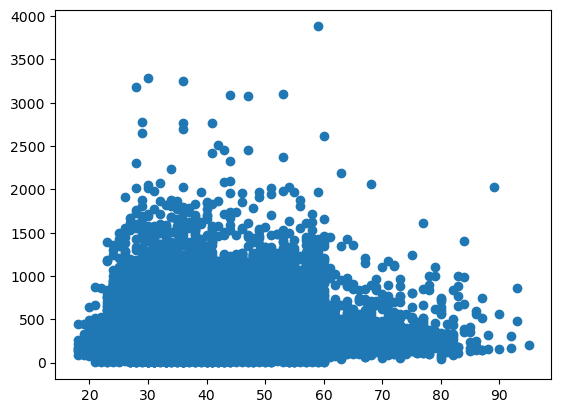

In [22]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(data['age'],data['duration'])

<AxesSubplot:>

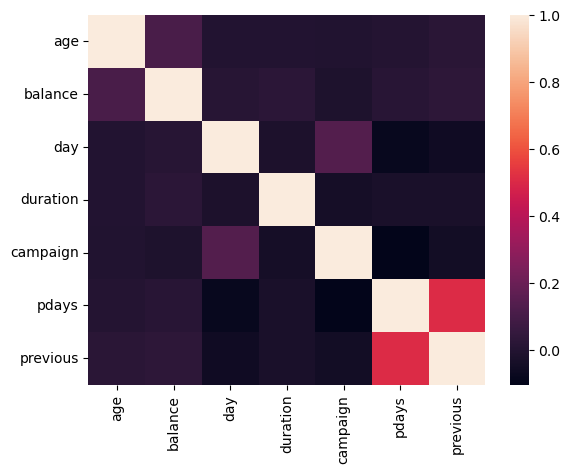

In [23]:
sns.heatmap(data.corr())

<AxesSubplot:>

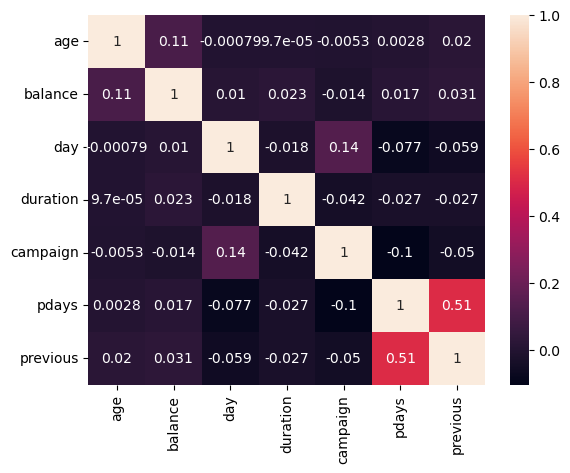

In [24]:
# heatmap with values
sns.heatmap(data.corr(), annot=True) 

Text(0.5, 1.0, 'Bar chart for Contact and Deposite')

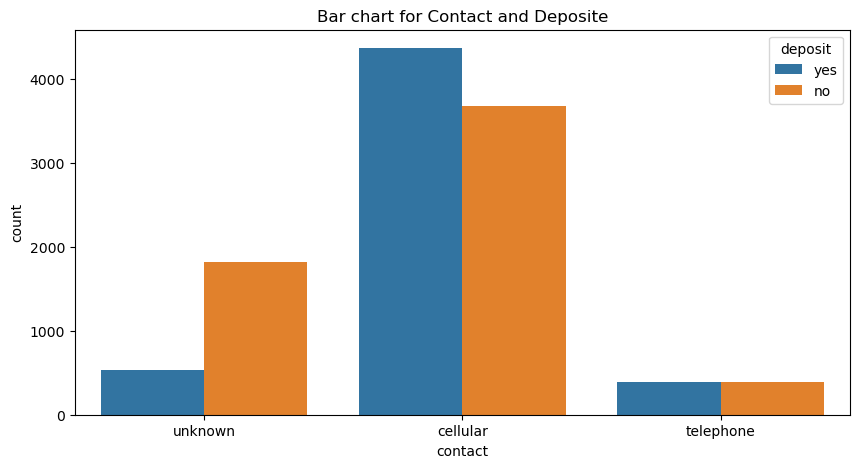

In [25]:
# bar chart
plt.figure(figsize=(10,5))
sns.countplot(x='contact',hue='deposit',data=data)
plt.title('Bar chart for Contact and Deposite')

# feature enginerring

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   fault      11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [27]:
objcol=data.select_dtypes(include=['object']).columns.tolist()
for i in objcol:
    print(i, '\n' ,data[i].unique())

job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
fault 
 ['no' 'yes']
housing 
 ['yes' 'no']
loan 
 ['no' 'yes']
contact 
 ['unknown' 'cellular' 'telephone']
month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 
 ['unknown' 'other' 'failure' 'success']
deposit 
 ['yes' 'no']


In [28]:
# convert binary category to numbers
data['fault'].replace(['yes','no'],[1,0],inplace=True)
data['housing'].replace(['yes','no'],[1,0],inplace=True)
data['loan'].replace(['yes','no'],[1,0],inplace=True)
data['deposit'].replace(['yes','no'],[1,0],inplace=True)

In [29]:
for col in ['fault','housing','loan','deposit']:
    data[col].replace(['yes','no'],[1,0],inplace=True)

In [30]:
data.sample(10)

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5815,34,management,married,tertiary,0,160,1,1,cellular,15,jul,130,1,-1,0,unknown,0
9910,43,self-employed,married,secondary,0,918,1,0,unknown,6,may,193,1,-1,0,unknown,0
9373,38,self-employed,married,secondary,0,290,1,0,unknown,20,may,369,1,-1,0,unknown,0
308,47,management,married,secondary,0,2892,0,0,unknown,17,jun,556,1,-1,0,unknown,1
6874,36,management,single,secondary,0,992,0,0,unknown,6,jun,351,1,-1,0,unknown,0
10318,32,management,single,tertiary,0,597,0,1,cellular,24,jul,869,1,-1,0,unknown,0
2005,28,admin.,single,secondary,0,154,1,0,cellular,15,may,536,1,364,1,other,1
1440,38,technician,married,tertiary,0,206,0,0,cellular,8,apr,350,2,-1,0,unknown,1
11021,49,entrepreneur,divorced,secondary,0,2908,0,0,unknown,6,jun,322,1,-1,0,unknown,0
9886,32,management,married,tertiary,0,2213,0,0,cellular,29,jan,125,2,154,7,failure,0


In [31]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [32]:
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,15]=le.fit_transform(data.iloc[:,15])

In [33]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
3,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
4,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
5,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [34]:
X=data.drop(columns='deposit')
Y=data['deposit']

In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_min_max=pd.DataFrame(min_max.fit_transform(X),columns=X.columns)

In [36]:
X_min_max.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.0,0.0,1.0
1,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.0,0.0,1.0
2,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0,1.0,0.133333,0.727273,0.357566,0.000000,0.0,0.0,1.0
3,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0,1.0,0.133333,0.727273,0.148750,0.000000,0.0,0.0,1.0
4,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0,1.0,0.133333,0.727273,0.172983,0.016129,0.0,0.0,1.0


## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [38]:
X_train.shape

(7813, 16)

In [39]:
X_test.shape

(3349, 16)

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [41]:
lr.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# make the prediction
y_pred=lr.predict(X_test)

In [43]:
print(y_pred)

[0 1 1 ... 0 1 1]


In [44]:
print(Y_test.values)

[0 1 1 ... 0 0 1]


In [45]:
lr.score(X_test,Y_test)

0.752762018512989

In [46]:
# Accuracy check
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,Y_test)*100

75.2762018512989

In [47]:
confusion_matrix(y_pred,Y_test)

array([[1389,  510],
       [ 318, 1132]], dtype=int64)

In [48]:
X_test.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5450,31,0,1,1,0,89,0,0,2,7,8,297,3,-1,0,3
2289,37,1,1,1,0,4321,0,0,0,5,6,657,1,-1,0,3
3371,28,0,2,2,0,832,0,0,1,29,7,433,3,342,1,0
1748,30,0,2,2,0,305,0,0,0,30,0,633,1,85,2,2
10782,43,1,1,0,0,8,0,0,1,7,5,245,5,-1,0,3


In [49]:
#X_test['y_actual']=Y_test.values
#X_test['y_pred']=y_pred

In [50]:
#X_test.to_csv('X_test1.csv')

In [51]:
#X_test.shape

## KNN classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred=knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
accuracy_score(y_pred,Y_test)*100

72.85756942370857

In [56]:
confusion_matrix(y_pred,Y_test)

array([[1298,  500],
       [ 409, 1142]], dtype=int64)

## Support vector machine

In [57]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')

In [58]:
svm.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [59]:
y_pred=svm.predict(X_test)

In [60]:
accuracy_score(y_pred,Y_test)*100

56.136160047775455

In [61]:
confusion_matrix(y_pred,Y_test)

array([[1036,  798],
       [ 671,  844]], dtype=int64)

## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy')

In [63]:
Classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4497860986993043, 0.9814814814814815, 'X[11] <= 206.5\nentropy = 0.997\nsamples = 7813\nvalue = [4166, 3647]'),
 Text(0.16343921144168147, 0.9444444444444444, 'X[11] <= 88.5\nentropy = 0.719\nsamples = 3175\nvalue = [2544, 631]'),
 Text(0.044987788632326824, 0.9074074074074074, 'X[12] <= 3.5\nentropy = 0.256\nsamples = 1020\nvalue = [976, 44]'),
 Text(0.026032415630550622, 0.8703703703703703, 'X[11] <= 62.5\nentropy = 0.338\nsamples = 685\nvalue = [642, 43]'),
 Text(0.011249259917110717, 0.8333333333333334, 'X[13] <= 356.0\nentropy = 0.155\nsamples = 355\nvalue = [347, 8]'),
 Text(0.005920663114268798, 0.7962962962962963, 'X[9] <= 26.5\nentropy = 0.111\nsamples = 340\nvalue = [335, 5]'),
 Text(0.002368265245707519, 0.7592592592592593, 'X[5] <= 9950.5\nentropy = 0.035\nsamples = 270\nvalue = [269, 1]'),
 Text(0.0011841326228537595, 0.7222222222222222, 'entropy = 0.0\nsamples = 265\nvalue = [265, 0]'),
 Text(0.003552397868561279, 0.7222222222222222, 'X[2] <= 1.5\nentropy = 0.722\

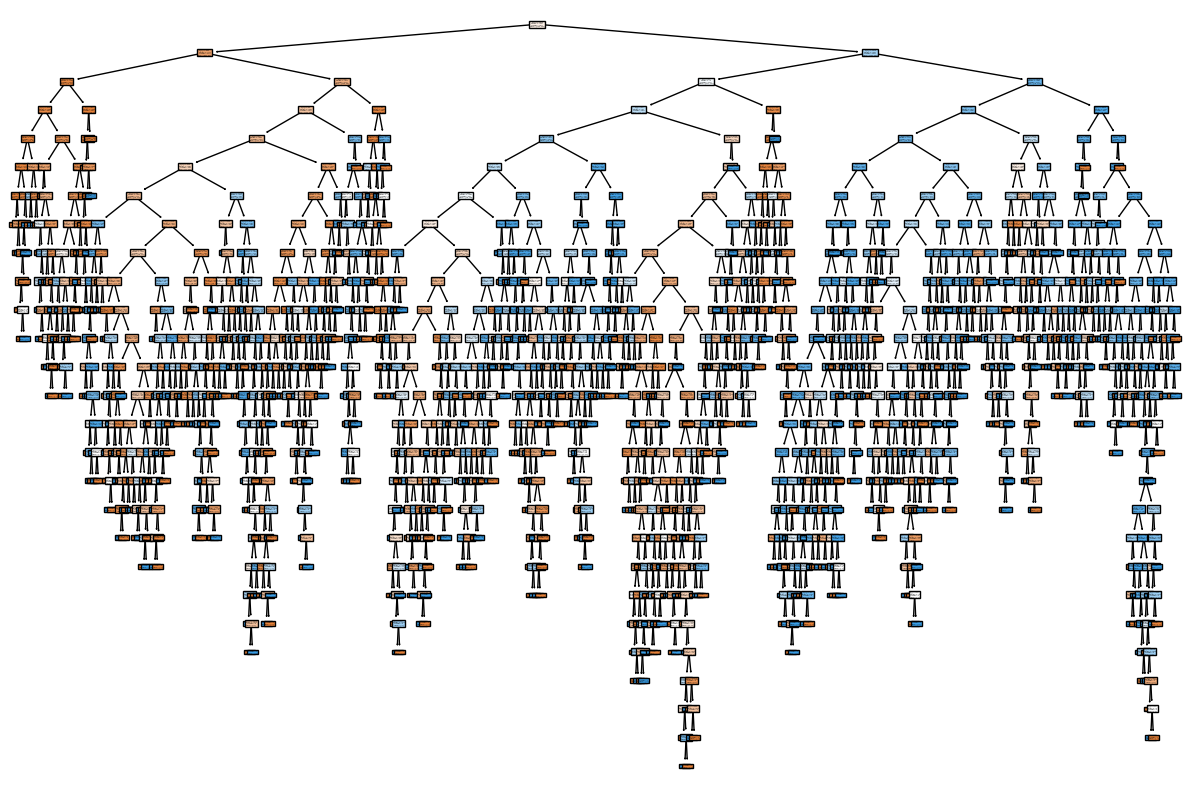

In [64]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Classifier,filled=True)

In [65]:
y_pred=Classifier.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,Y_test)*100

77.93371155568826

In [67]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1728
           1       0.77      0.78      0.77      1621

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [68]:
confusion_matrix(y_pred,Y_test)

array([[1348,  380],
       [ 359, 1262]], dtype=int64)

## Naiv Bayes Classfier

In [69]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [70]:
classifier.fit(X_train,Y_train)

GaussianNB()

In [71]:
y_pred  =  classifier.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,Y_test)

0.7500746491489997

In [73]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1634
           1       0.77      0.73      0.75      1715

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



In [74]:
confusion_matrix(y_pred,Y_test)

array([[1252,  382],
       [ 455, 1260]], dtype=int64)

## Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [76]:
rfc=rfc.fit(X_train,Y_train)

In [77]:
y_pred  =  rfc.predict(X_test)

In [78]:
accuracy_score(y_pred,Y_test)*100

84.62227530606151

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1608
           1       0.87      0.82      0.85      1741

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [81]:
confusion_matrix(y_pred,Y_test)

array([[1400,  208],
       [ 307, 1434]], dtype=int64)